In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path = 'PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, delimiter=';')

In [3]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual

In [4]:
df['TEMPO_INGRESSO_2022'] = 2022 - df['ANO_INGRESSO_2022']

In [5]:
def filter_columns_in(df, filters: list):
    selected_columns = [False] * len(df.columns)
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = True
    return df[df.columns[selected_columns]]

In [6]:
def filter_columns(df, filters: list):
    selected_columns = [True] * len(df.columns)
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [7]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all')
  _df = _df[~_df.isna().all(axis=1)]
  return _df

RF


In [8]:
df_predict = filter_columns_in(df, ['IAN_2022', 'IEG_2022','IPS_2022','IPV_2022', 'IAA_2022', 'IDA_2022', 'IPP_2022', 'INDE_2022'])
df_predict.head()

,INDE_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.675509,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,5.625000,7.916665,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.117065,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,6.250000,8.055553,5.0
4,7.232336,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.458333,7.833337,5.0


In [9]:
df_predict = filter_columns(df_predict,['DESTAQUE_'])
df_predict.head()

,INDE_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.675509,10.00002,7.581705,7.5,8.816667,5.625000,7.916665,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.117065,10.00002,8.071429,7.5,5.083333,6.250000,8.055553,5.0
4,7.232336,6.41668,8.557505,7.5,7.083333,6.458333,7.833337,5.0


In [10]:
df_predict = cleaning_dataset(df_predict)

# Features Importance

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Create a random forest classifier
regressor = RandomForestRegressor(random_state=42, max_depth=5)

# Select relevant features and target variable, 'NOME'
features = df_predict.drop(['INDE_2022'], axis=1)
target = df_predict['INDE_2022']

# Identify columns with non-numerical data
categorical_cols = features.select_dtypes(include=['object']).columns

# Apply label encoding to convert categorical features to numerical
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le  # Store encoders for later use if needed

# Impute missing values using SimpleImputer (replace NaNs with most frequent value)
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
features_imputed = imputer.fit_transform(features)  # Impute missing values

# Handle missing values in the target variable (INDE_2022)
# Option 1: Remove rows with missing target values
features_imputed = features_imputed[~target.isna()] # Select rows where target is not NaN
target = target[~target.isna()] # Select corresponding target values

# Option 2: Impute missing target values (if appropriate for your data)
# target_imputer = SimpleImputer(strategy='most_frequent') # Choose an appropriate strategy
# target = target_imputer.fit_transform(target.values.reshape(-1, 1)).ravel()

# Fit the classifier to the data with numerical features and imputed values
regressor.fit(features_imputed, target)  # Use imputed features

# Get the feature importances
importances = regressor.feature_importances_

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

    feature  importance
3  IDA_2022    0.516763
1  IEG_2022    0.313273
5  IPV_2022    0.099494
6  IAN_2022    0.044324
0  IAA_2022    0.018093
2  IPS_2022    0.004390
4  IPP_2022    0.003663


In [12]:
# Define o target  'BOLSISTA_2022'
y = df_predict['INDE_2022']

# Apply label encoding to the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
import plotly.graph_objects as go

# Dados para o gráfico
feature_names = feature_importances['feature'].to_list()
importances = feature_importances['importance'].to_list()

# Criação do gráfico de barras horizontais
fig = go.Figure(data=[go.Bar(
    y=feature_names,
    x=importances,
    orientation='h'
)])

# Atualização dos layouts e rótulos
fig.update_layout(
    title='Feature Importances',
    xaxis_title='Importance',
    yaxis_title='Feature',
    yaxis=dict(autorange='reversed'),
    template='plotly_white'  # Move template to figure level
)

# Mostrar o gráfico
fig.show()

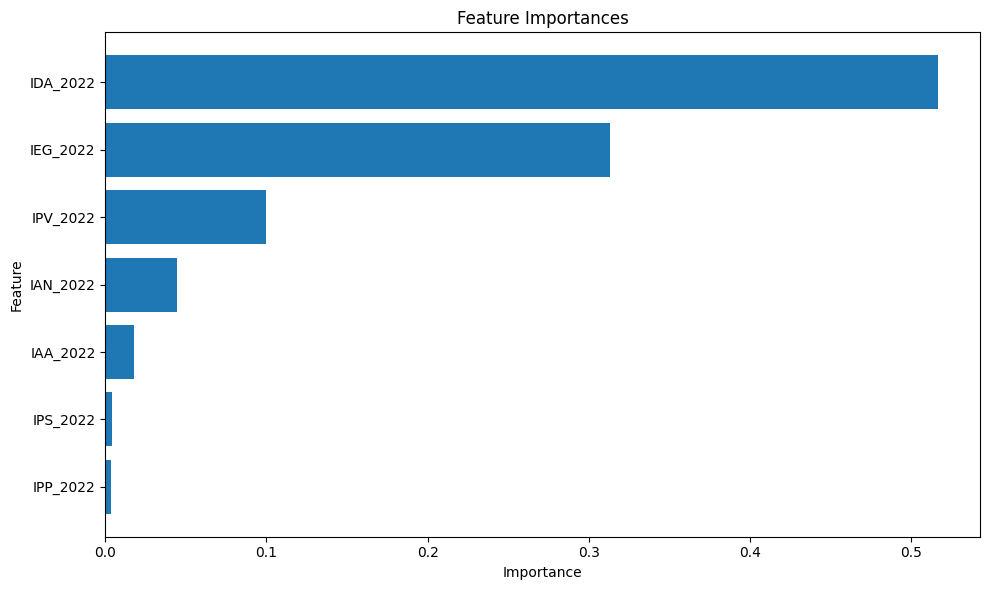

In [14]:
# Extract feature names and importances from the DataFrame
feature_names = feature_importances['feature'].to_list()
importances = feature_importances['importance'].to_list()

# Create a bar chart with inverted y-axis
plt.figure(figsize=(10, 6))
plt.barh(feature_names[::-1], importances[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Modelos

## 1 - Random Forest
Previsão para Bolsista 2022 utilizando 5 features importance

In [15]:
train_df = df_predict.sample(frac=0.8, random_state=42)
test_df = df_predict.drop(train_df.index)

In [16]:
X_train, y_train = train_df.loc[:, train_df.columns != 'INDE_2022'], train_df['INDE_2022']
X_test, y_test= test_df.loc[:, test_df.columns != 'INDE_2022'], test_df['INDE_2022']

In [17]:
X_train.isna().sum()

IAA_2022    0
IEG_2022    0
IPS_2022    0
IDA_2022    0
IPP_2022    0
IPV_2022    0
IAN_2022    0
dtype: int64

In [18]:

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters found
# print('Best parameters found: ', grid_search.best_params_)

# # Get the best estimator
# best_rf = grid_search.best_estimator_


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

regressor_rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42, min_samples_split=2, min_samples_leaf=1)

# Select only numeric columns for imputation
numeric_cols = X_train.select_dtypes(include=['number']).columns

#Handle missing values using SimpleImputer for numeric columns only
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_train_imputed = imputer.fit_transform(X_train[numeric_cols])
X_test_imputed = imputer.transform(X_test[numeric_cols]) # Use the same imputer fitted on training data

# Train the classifier on the imputed training data (use the imputed data here)
regressor_rf.fit(X_train_imputed, y_train)

# Predict the labels for the test data (use the imputed data here)
y_pred = regressor_rf.predict(X_test_imputed)

# Print the accuracy score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.10191707729524585


In [20]:
import joblib

# Save the trained model to a file
joblib.dump(regressor_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [21]:
!pip install graphviz


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


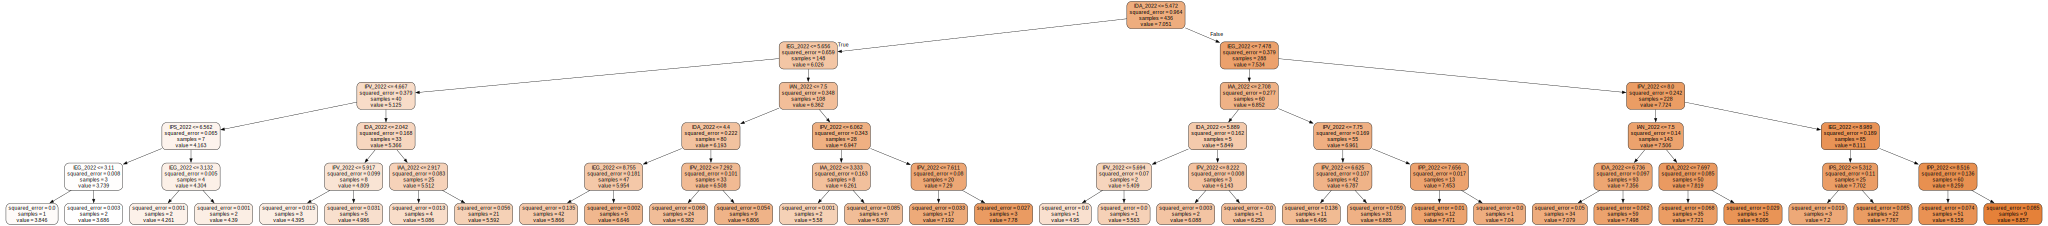

In [22]:
from sklearn.tree import export_graphviz
import graphviz

# Get the first tree from the forest
tree = regressor_rf.estimators_[0]

# Export the tree to a file, use numeric_cols for feature names
export_graphviz(tree, out_file='tree.dot',
                feature_names=numeric_cols, # Pass the correct feature names
                class_names=['0', '1'],
                label='all', filled=True, rounded=True)

# Load the graph from the file
with open('tree.dot') as f:
    dot_graph = f.read()

# Create a graphviz object
graphviz_object = graphviz.Source(dot_graph)

# Display the graph
graphviz_object

In [23]:
input_features = []

for feature in numeric_cols:
    while True:
        try:
            value_str = input(f'Digite um valor de 0 a 10 (use vírgula para decimais) para {feature}: ')
            value = float(value_str.replace(',', '.'))
            if 0 <= value <= 10:
                input_features.append(value)
                break
            else:
                print('O valor deve estar entre 0 e 10. Tente novamente.')
        except ValueError:
            print('Entrada inválida. Por favor, insira um número.')

# Reshape the input features to match the model's expected input format
input_features = np.array(input_features).reshape(1, -1)

# Make a prediction using the trained model
prediction = regressor_rf.predict(input_features)

# Classify the prediction based on INDE_2022 ranges
if 2.405 <= prediction[0] <= 5.506:
  label = 'Quartzo'
elif 5.506 < prediction[0] <= 6.868:
  label = 'Agata'
elif 6.868 < prediction[0] <= 8.230:
  label = 'Ametista'
elif 8.230 < prediction[0] <= 9.294:
  label = 'Topazio'
else:
  label = 'Unknown'

# Print the prediction and its label
print('Predicted INDE_2022:', prediction[0].round(23))
print('Classification:', label)

Entrada inválida. Por favor, insira um número.
Entrada inválida. Por favor, insira um número.
Predicted INDE_2022: 6.448739021715308
Classification: Agata


## 2- KNN Regressors

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_imputed, y_train)

KNeighborsRegressor()

In [26]:
predict_knn = model_knn.predict(X_test_imputed)

In [27]:
print('Mean Squared Error:', mean_squared_error(y_test, predict_knn))

Mean Squared Error: 0.0380001499071727


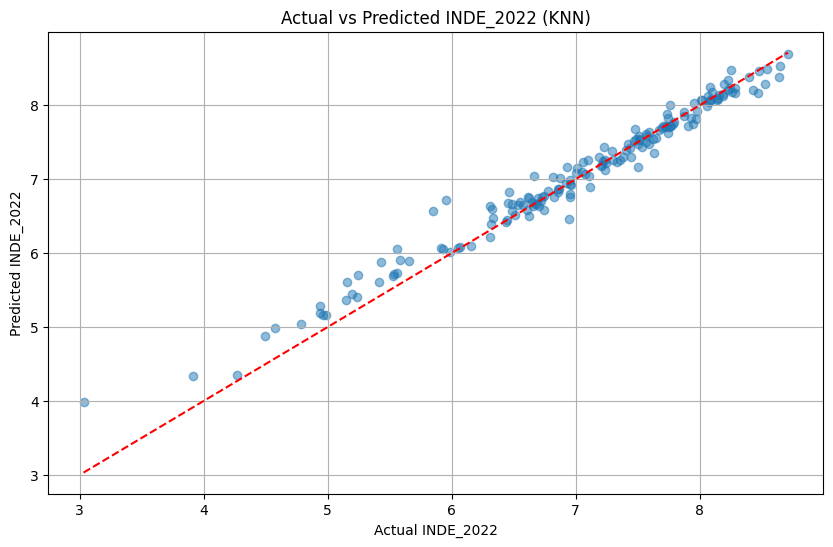

In [28]:
# prompt: crie um grafico do knn acima

import matplotlib.pyplot as plt
# Assuming 'y_test' and 'predict_knn' are available from the preceding code

# Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predict_knn, alpha=0.5)
plt.xlabel('Actual INDE_2022')
plt.ylabel('Predicted INDE_2022')
plt.title('Actual vs Predicted INDE_2022 (KNN)')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.grid(True)
plt.show()


In [29]:
joblib.dump(model_knn, 'model/knn_model_inde.pkl')

['model/knn_model_inde.pkl']

In [30]:
import plotly.graph_objects as go

# Supondo que 'y_test' e 'predict_knn' estejam definidos
# Exemplo fictício de dados para fins de ilustração
# y_test = np.array([...])
# predict_knn = np.array([...])

# Criação do gráfico de dispersão
fig = go.Figure()

# Adicionar o gráfico de dispersão
fig.add_trace(go.Scatter(
    x=y_test,
    y=predict_knn,
    mode='markers',
    name='Previsto',
    marker=dict(size=8, opacity=0.5, color='blue'),
    text='Ponto de dados'  # Texto opcional ao passar o mouse
))

# Adicionar a linha diagonal para referência
fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    name='Linha de Referência',
    line=dict(color='red', width=2, dash='dash')
))

# Atualizar o layout do gráfico
fig.update_layout(
    title='Real x Previsão -teste modelo KNN para o indicador INDE_2022',
    xaxis_title='INDE_2022 real',
    yaxis_title='INDE_2022 previsto',
    xaxis=dict(range=[min(y_test), max(y_test)]),
    yaxis=dict(range=[min(y_test), max(y_test)]),
    template='plotly_white'  # Layout do gráfico, você pode usar 'plotly_dark' ou outro
)

# Mostrar o gráfico
fig.show()


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Supondo que df_predict é o DataFrame com os dados de treinamento
features = df_predict.drop(['INDE_2022'], axis=1)
target = df_predict['INDE_2022']

# Identificar colunas com dados não numéricos
categorical_cols = features.select_dtypes(include=['object']).columns

# Aplicar Label Encoding para converter características categóricas em numéricas
label_encoders = {}
# Check if there are any categorical columns before proceeding
if len(categorical_cols) > 0:
    for col in categorical_cols:
        le = LabelEncoder()
        features[col] = le.fit_transform(features[col])
        label_encoders[col] = le  # Armazenar encoders para uso posterior

    # Imputar valores ausentes para dados categóricos e numéricos separadamente
    # Separar dados numéricos e categóricos
    numeric_features = features.select_dtypes(include=['number'])
    categorical_features = features.select_dtypes(include=['object'])

    # Imputar valores ausentes para dados categóricos com a estratégia 'most_frequent' 
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    categorical_features_imputed = pd.DataFrame(categorical_imputer.fit_transform(categorical_features), columns=categorical_features.columns)

    # Imputar valores ausentes para dados numéricos com uma estratégia apropriada
    numeric_imputer = SimpleImputer(strategy='mean') # Or any other suitable strategy
    numeric_features_imputed = pd.DataFrame(numeric_imputer.fit_transform(numeric_features), columns=numeric_features.columns)

    # Concatenar dados numéricos e categóricos imputados
    features_imputed = pd.concat([numeric_features_imputed, categorical_features_imputed], axis=1)
else:
    # If no categorical columns, just impute the numerical features
    numeric_imputer = SimpleImputer(strategy='mean') # Or any other suitable strategy
    features_imputed = pd.DataFrame(numeric_imputer.fit_transform(features), columns=features.columns)

# Remover linhas com valores ausentes no alvo
# Reset the index of both features_imputed and target to ensure alignment
features_imputed = features_imputed.reset_index(drop=True)  # Reset index of features
target = target.reset_index(drop=True)  # Reset index of target

valid_rows = ~target.isna()
features_imputed = features_imputed[valid_rows]
target = target[valid_rows]

# Treinar o modelo
regressor = RandomForestRegressor(random_state=42, max_depth=5)
regressor.fit(features_imputed, target)

# Obter a importância das características
importances = regressor.feature_importances_

# Criar um DataFrame de importâncias das características
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importances})

# Ordenar as características por importância
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

    feature  importance
3  IDA_2022    0.516763
1  IEG_2022    0.313273
5  IPV_2022    0.099494
6  IAN_2022    0.044324
0  IAA_2022    0.018093
2  IPS_2022    0.004390
4  IPP_2022    0.003663


In [36]:
# Salvar o modelo treinado
#joblib.dump(regressor, 'rf_features.pkl')

# Salvar os LabelEncoders
#joblib.dump(label_encoders, 'label_encoders.pkl')

# Salvar o SimpleImputer
#joblib.dump(imputer, 'simple_imputer.pkl')

In [37]:
#joblib.dump(numeric_imputer, 'numeric_imputer.pkl')


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

features = df_predict.drop(['INDE_2022'], axis=1)
target = df_predict['INDE_2022']

# Imputar valores ausentes
numeric_imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(numeric_imputer.fit_transform(features), columns=features.columns)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Criar e treinar o modelo
regressor = RandomForestRegressor(random_state=42, max_depth=5)
regressor.fit(X_train, y_train)

# Salvar o modelo e imputadores
#joblib.dump(regressor, 'model/rf_features.pkl')
#joblib.dump(numeric_imputer, 'model/numeric_imputer.pkl')


['model/numeric_imputer.pkl']